# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

# <h1><center>Actividad 7 - Actividad de Integración</center></h1>

Esta actividad busca que los estudiantes conecten el trabajo de agrupación y de resumen, junto con calcular estadísticas de datos así como también realizar visualización básica.

## Instrucciones

Este Notebook contiene las instrucciones a realizar para la actividad. 

<b>Al finalizarla, deben subir el Notebook y los archivos generados en un único archivo .zip, al módulo de la Actividad 07 en Canvas.</b>

Para esta actividad trabajarán con el dataset [palmerpenguins](https://github.com/allisonhorst/palmerpenguins/blob/main/README.md), un set de datos con mediciones de 3 especies de pingüinos que habitan en la Antártica y sus islas. Estos datos incluyen peso, tamaño de las aletas y mediciones del "culmen" para hembras y machos de las 3 especies. (Abajo pueden ver una imagen explicativa sobre estas mediciones.)

<img src="culmen_depth.png" alt="bill_size" width="700"/>

## Rúbrica

- Si han logrado todo: 7.0
- Si han logrado sólo los puntos 1 y 2: 5.0
- Menos que eso: 1.0

## 1. Base de datos unificada

### 1.1 Lectura de datos

En la carpeta `penguins/` podrá encontrar tres archivos `.csv`, cada uno con registros de las mediciones de una especie de pingüino antártico.
Primero, lea cada uno de estos archivos como un DataFrame separado.

### 1.2  Base de datos unificada

Ahora junte los tres DataFrames en un nuevo DataFrame llamado `penguins`, agregando una nueva columna `species` que identifique el nombre de la especie de cada pingüino (Adelie, Chinstrap o Gentoo).

### 1.3 Inspección y limpieza

Inspeccione el DataFrame `penguins` y sus columnas. ¿Están correctamente asignados los tipos de cada columna? ¿Alguna podría ser categórica? ¿Existen valores nulos o inválidos? Aplique las transformaciones y limpiezas que considere necesarisas al DataFrame, explicando en los comentarios (o nuevas celdas) por qué hizo dichas transformaciones.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt


In [19]:
adelie = pd.read_csv("adelie.csv")
chinstrap = pd.read_csv("chinstrap.csv")
gentoo = pd.read_csv("gentoo.csv")
adelie["species"] = "Adelie"
chinstrap["species"] = "Chinstrap"
gentoo["species"] = "Gentoo"
penguins = pd.concat([adelie, chinstrap, gentoo], ignore_index=True)
penguins = penguins.dropna()
penguins = penguins[penguins["sex"] != "."]
penguins.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species
0,Torgersen,39.1,18.7,181.0,3750.0,MALE,Adelie
1,Torgersen,39.5,17.4,186.0,3800.0,FEMALE,Adelie
2,Torgersen,40.3,18.0,195.0,3250.0,FEMALE,Adelie
4,Torgersen,36.7,19.3,193.0,3450.0,FEMALE,Adelie
5,Torgersen,39.3,20.6,190.0,3650.0,MALE,Adelie


si existian valores nulos y se eliminaron los valores NaN ya que parecian vacios en las filas, y tambien existia un "." como valor en sex el cual no hacia sentido asi que se elimino del dataframe.
y todas las columnas parecen tener un correcto tipo de categorizacion

## 2. Revisión de base de datos

### 2.1 Análisis de base completa

Responda las siguientes preguntas a partir del DataFrame `penguins`:
* a. ¿Cuántas filas tiene la base de datos conjunta?
* b. ¿Cuáles son los valores mínimo y máximo de todas las columnas con datos numéricos?
* c. ¿Cuántos machos y cuántas hembras hay en el set de datos, respectivamente?

### 2.2 Análisis agrupados

Responda las siguientes preguntas:

* a. En promedio, ¿cuál es la especie más pesada de pingüino?
* b. Para cada especie, ¿hay alguna diferencia significativa entre hembras y machos en relación al peso promedio?
* c. ¿En qué especie varía menos el tamaño de aleta?

In [20]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             333 non-null    object 
 1   culmen_length_mm   333 non-null    float64
 2   culmen_depth_mm    333 non-null    float64
 3   flipper_length_mm  333 non-null    float64
 4   body_mass_g        333 non-null    float64
 5   sex                333 non-null    object 
 6   species            333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [21]:
print(penguins.describe())

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
count        333.000000       333.000000         333.000000   333.000000
mean          43.992793        17.164865         200.966967  4207.057057
std            5.468668         1.969235          14.015765   805.215802
min           32.100000        13.100000         172.000000  2700.000000
25%           39.500000        15.600000         190.000000  3550.000000
50%           44.500000        17.300000         197.000000  4050.000000
75%           48.600000        18.700000         213.000000  4775.000000
max           59.600000        21.500000         231.000000  6300.000000


In [22]:
print(penguins["sex"].value_counts())

sex
MALE      168
FEMALE    165
Name: count, dtype: int64


2.1
A) la base de datos tiene 334 filas

B) el maximo para el largo del culmen es 59.6mm y el minimo es 32.1mm,
  el maximo de profudidad del culme es 21.5mm y el minimo es 13.1mm,
  el maximo de largo de flipper es 231mm y el minimo es 172mm
  el maximo de body_mass es 6200g y el minimo es 2700g

C) Hay 168 machos y 165 hembras en el dataframe




In [24]:
print(penguins.groupby("species")["body_mass_g"].mean())

species
Adelie       3706.164384
Chinstrap    3733.088235
Gentoo       5092.436975
Name: body_mass_g, dtype: float64


In [25]:
print(penguins.groupby(["species", "sex"])["body_mass_g"].mean())

species    sex   
Adelie     FEMALE    3368.835616
           MALE      4043.493151
Chinstrap  FEMALE    3527.205882
           MALE      3938.970588
Gentoo     FEMALE    4679.741379
           MALE      5484.836066
Name: body_mass_g, dtype: float64


In [18]:
print(penguins.groupby("species")["flipper_length_mm"].var())

species
Adelie       42.534199
Chinstrap    50.863916
Gentoo       43.003922
Name: flipper_length_mm, dtype: float64


2.2
A) la especie mas pesada en promedio es "Gentoo"

B) se aprecia una diferencia de casi 700g entre el macho y la hembra (siendo el macho el que tiene esa ventaja) en todas las especies.

C) en la especie "Adelie" se encunetra una enor varianza en la aleta 

## 3. Análisis exploratorio

### 3.1 Estadísticas de resumen

Elija una de las tres especies y responda las siguientes preguntas solamente para la especie elegida:

* a. ¿Cuál es el coeficiente de correlación entre `culmen_length` y `flipper_length`? ¿Qué nos indica este valor? Comente.
* b. ¿Cual es el peso máximo del percentil 10 (el decil más bajo) para los machos?
* c. ¿Cuál es la varianza de `culmen_depth` para las hembras?

### 3.2 Visualización

Utilizando la librería de visualización de su preferencia (matplotlib, seaborn, plotly), genere los siguientes gráficos:

* a. Un scatterplot que relacione las variables `culmen_length` y `flipper_length` para las tres especies. Utilice colores distintos para diferenciar las especies entre sí.
* b. Un histograma que muestre la distribución de peso para pingüinos macho y hembra. Utilice colores distintos para diferenciar los dos grupos.

Analice y comente los resultados que obtuvo. No olvide colocar título y nombres claros a los ejes de sus gráficos.

In [28]:
especie_escogida = penguins[penguins["species"] == "Adelie"]
correlacion = especie_escogida["culmen_length_mm"].corr(especie_escogida["flipper_length_mm"])
print(correlacion)

0.3322739620956146


In [31]:
macho = especie_escogida[especie_escogida["sex"] == "MALE"]
peso_percentil_10 = macho["body_mass_g"].quantile(0.1)
print(peso_percentil_10)

3560.0


In [32]:
hembras = especie_escogida[especie_escogida["sex"] == "FEMALE"]
var_culmen = hembras["culmen_length_mm"].var()
print(var_culmen)

4.116366057838661


3.1 especie escogida = Adelie
A) el coef de relacion entre el largo del culme y el largo de la ala es de 0.3322, y este valor nos dice que que el tamaño del pico y del ala estan muy relacionado ya que existe una diferencia minima entre estos dos valores

B) El peso maximo del percentil 10 de los machos de esta especie es de 3560g

c) La varianza del largo del pico de las hembras es de 4.116

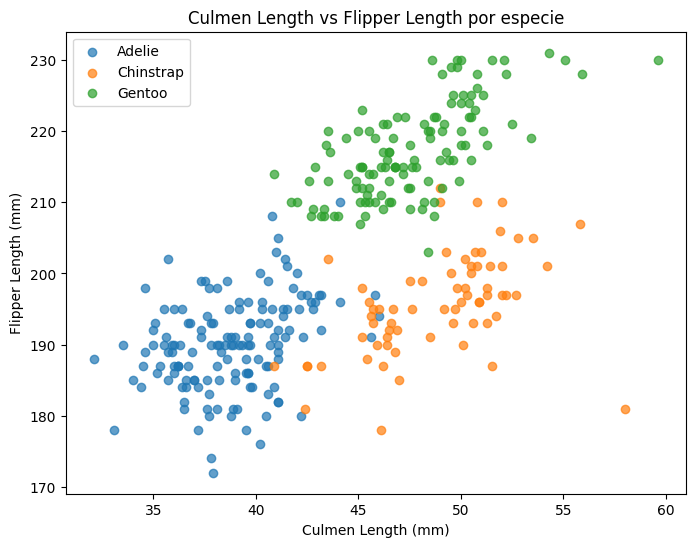

In [33]:
species = penguins["species"].unique()
colors = ["tab:blue", "tab:orange", "tab:green"]

plt.figure(figsize=(8, 6))
for sp, color in zip(species, colors):
    subset = penguins[penguins["species"] == sp]
    plt.scatter(subset["culmen_length_mm"], subset["flipper_length_mm"], label=sp, alpha=0.7, color=color)
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Flipper Length (mm)")
plt.title("Culmen Length vs Flipper Length por especie")
plt.legend()
plt.show()